In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Visualize the distributions of genes in TCGA

##### Raw distributions

In [2]:
df_whole = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_counts.csv', index_col=0)])
df_kir = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_kir_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_kir_counts.csv', index_col=0)])
large_populations, size = [], []
for i, population in enumerate(population_dictionary.keys()):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    if len(df_tmp) > population_size_cutoff:
        large_populations.append(population)
        size.append(len(df_tmp))
plotting_df = pd.DataFrame({'Population': large_populations,
                            'Size': size})
plotting_df = plotting_df.sort_values('Size', ascending=False)

In [3]:
df_whole = df_whole.ix[[x for x in df_whole.index if x not in sorta_low_coverage_patients]]
df_kir = df_kir.ix[[x for x in df_kir.index if x not in sorta_low_coverage_patients]]

In [4]:
population = 'TCGA_agilent'

626


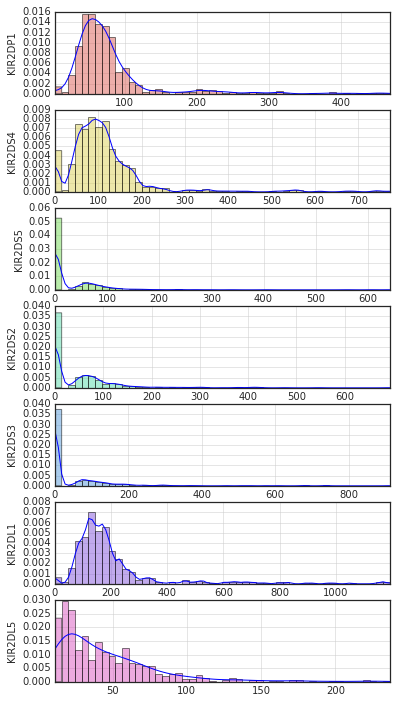

In [5]:
# non-anchor genes
k = 20
gene_set = nonanchor_genes
palette = sns.color_palette("hls", len(gene_set))

samples = population_dictionary_stripped[population]
df_tmp = df_kir.ix[samples].dropna()
print len(df_tmp)

f, axarr = plt.subplots(4, figsize=(6, 12))

for i, gene in enumerate(gene_set):
    gene_set_values = df_tmp[kmers[20][gene]].mean(axis=1)
    minimum, maximum = gene_set_values.min(), gene_set_values.max()
    
    plt.subplot(len(gene_set), 1, i+1)
    (gene_set_values).hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_gene_set_values = gene_set_values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(list_gene_set_values)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    #(nonanchor).plot(kind='kde', color=palette[i], bw=0.5, lw=3)
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

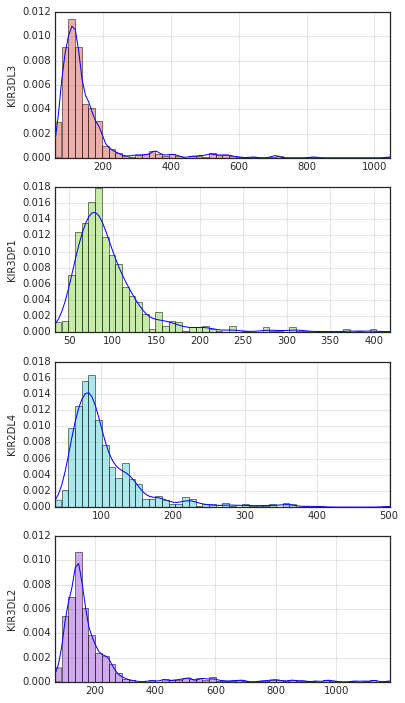

In [6]:
# anchor genes
k = 20
gene_set = anchor_genes
palette = sns.color_palette("hls", len(gene_set))

samples = population_dictionary_stripped[population]
df_tmp = df_kir.ix[samples].dropna()

f, axarr = plt.subplots(4, figsize=(6, 12))

for i, gene in enumerate(gene_set):
    gene_set_values = df_tmp[kmers[20][gene]].mean(axis=1)
    minimum, maximum = gene_set_values.min(), gene_set_values.max()
    
    plt.subplot(len(gene_set), 1, i+1)
    (gene_set_values).hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_gene_set_values = gene_set_values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(list_gene_set_values)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    #(nonanchor).plot(kind='kde', color=palette[i], bw=0.5, lw=3)
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

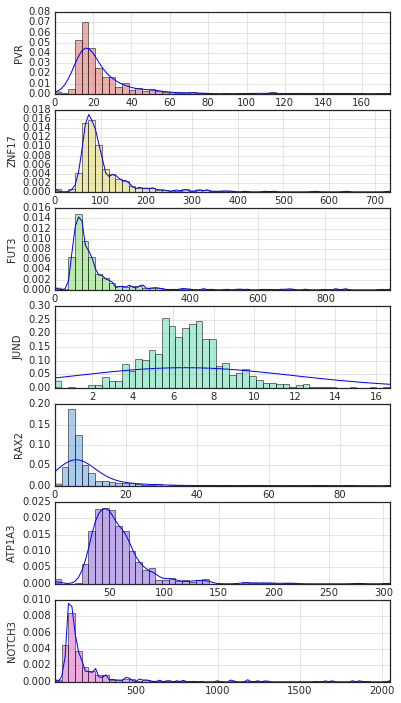

In [10]:
# reference genes
k = 20
gene_set = ref_genes
palette = sns.color_palette("hls", len(gene_set))

samples = population_dictionary_stripped[population]
df_tmp = df_whole.ix[samples].dropna()

f, axarr = plt.subplots(4, figsize=(6, 12))

for i, gene in enumerate(gene_set):
    gene_set_values = df_tmp[refs[gene]].mean(axis=1)
    minimum, maximum = gene_set_values.min(), gene_set_values.max()
    
    plt.subplot(len(gene_set), 1, i+1)
    (gene_set_values).hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_gene_set_values = gene_set_values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(list_gene_set_values)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    #(nonanchor).plot(kind='kde', color=palette[i], bw=0.5, lw=3)
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

##### Normalized by sum of all kir-based kmers

3156 629 626
2.31919273258
1.22060098996
3.35496337516
2.52804686504
3.37047243024
0.845557830423
2.08267024765


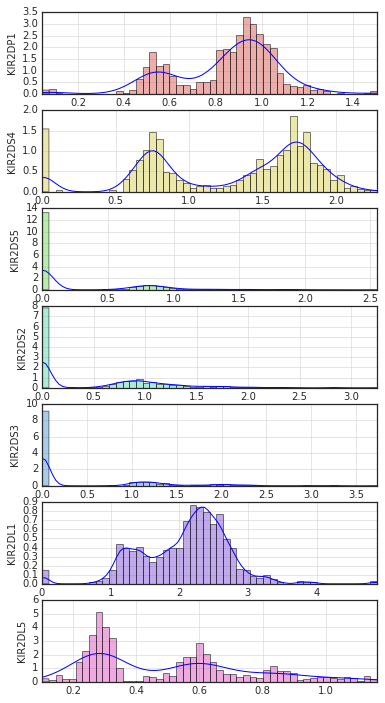

In [8]:
k = 20
gene_set = nonanchor_genes
palette = sns.color_palette("hls", len(gene_set))

samples = population_dictionary_stripped[population]
df_whole_tmp = df_whole.ix[samples].dropna()
df_kir_tmp = df_kir.ix[samples].dropna()
f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

print len(samples), len(df_whole_tmp), len(df_kir_tmp)

for i, gene in enumerate(gene_set):
    nonanchor = df_kir_tmp[kmers[20][gene]].mean(axis=1)
    normalizer = df_kir_tmp[all_kir_kmers].mean(axis=1)

    merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
    merged.columns = ['nonanchor', 'normalizer']
    merged['normalized'] = merged['nonanchor'] / merged['normalizer']

    minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

    plt.subplot(len(gene_set), 1, i+1)
    merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_normalized = merged['normalized'][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    print np.exp(log_dens).max()
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

3156 629 626


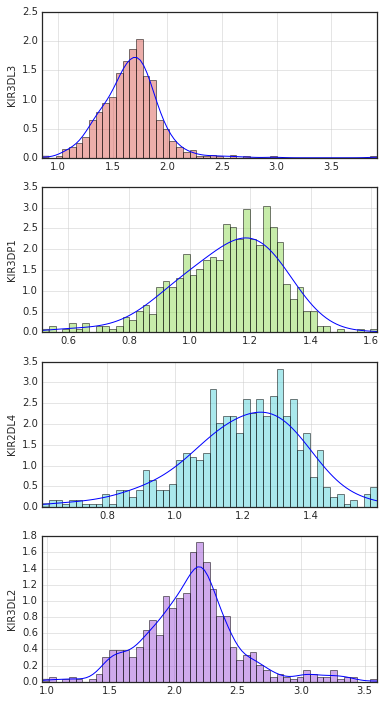

In [9]:
k = 20
gene_set = anchor_genes
palette = sns.color_palette("hls", len(gene_set))

samples = population_dictionary_stripped[population]
df_whole_tmp = df_whole.ix[samples].dropna()
df_kir_tmp = df_kir.ix[samples].dropna()
f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

print len(samples), len(df_whole_tmp), len(df_kir_tmp)

for i, gene in enumerate(gene_set):
    nonanchor = df_kir_tmp[kmers[20][gene]].mean(axis=1)
    normalizer = df_kir_tmp[all_kir_kmers].mean(axis=1)

    merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
    merged.columns = ['nonanchor', 'normalizer']
    merged['normalized'] = merged['nonanchor'] / merged['normalizer']
    
    minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

    plt.subplot(len(gene_set), 1, i+1)
    merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_normalized = merged['normalized'][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

##### Normalized distributions (by ZNF17)

ZNF17
3156 629 626


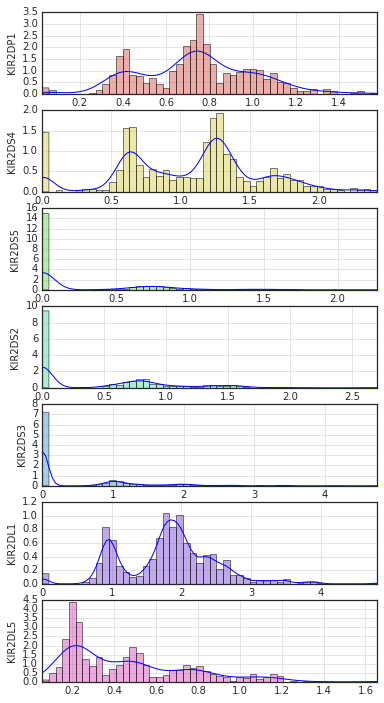

In [10]:
k = 20
normalizing_gene = 'ZNF17'
gene_set = nonanchor_genes
palette = sns.color_palette("hls", len(gene_set))

print normalizing_gene
samples = population_dictionary_stripped[population]
df_whole_tmp = df_whole.ix[samples].dropna()
df_kir_tmp = df_kir.ix[samples].dropna()
f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

print len(samples), len(df_whole_tmp), len(df_kir_tmp)

for i, gene in enumerate(gene_set):
    nonanchor = df_kir_tmp[kmers[20][gene]].mean(axis=1)
    normalizer = df_whole_tmp[refs[normalizing_gene]].mean(axis=1)

    merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
    merged.columns = ['nonanchor', 'normalizer']
    merged['normalized'] = merged['nonanchor'] / merged['normalizer']

    minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

    plt.subplot(len(gene_set), 1, i+1)
    merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_normalized = merged['normalized'][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

ZNF17
3156 629 626


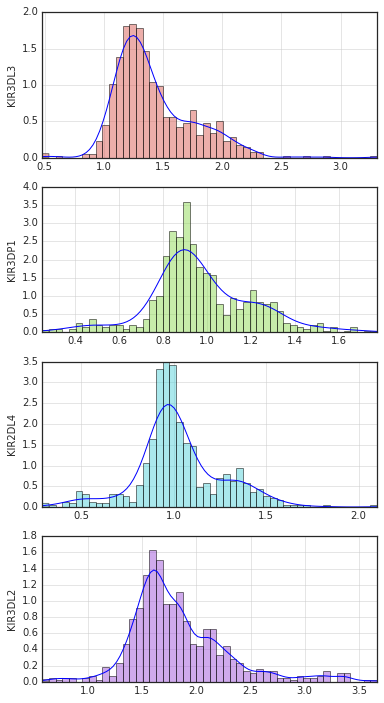

In [11]:
k = 20
normalizing_gene = 'ZNF17' # 'ATP1A3'
gene_set = anchor_genes
palette = sns.color_palette("hls", len(gene_set))


print normalizing_gene
samples = population_dictionary_stripped[population]
df_whole_tmp = df_whole.ix[samples].dropna()
df_kir_tmp = df_kir.ix[samples].dropna()
f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

print len(samples), len(df_whole_tmp), len(df_kir_tmp)

for i, gene in enumerate(gene_set):
    nonanchor = df_kir_tmp[kmers[20][gene]].mean(axis=1)
    normalizer = df_whole_tmp[refs[normalizing_gene]].mean(axis=1)

    merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
    merged.columns = ['nonanchor', 'normalizer']
    merged['normalized'] = merged['nonanchor'] / merged['normalizer']

    minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

    plt.subplot(len(gene_set), 1, i+1)
    merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
    list_normalized = merged['normalized'][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
    X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    plot(X_plot[:, 0], np.exp(log_dens), '-')
    plt.xlim(minimum, maximum)
    plt.ylabel(gene)

plt.show()
plt.clf()

#### How does KIR3DL3 sum compare to ZNF17 for individual patients

In [12]:
population = 'TCGA_agilent'

In [13]:
samples = population_dictionary_stripped[population]
df_tmp = df_whole.ix[samples].dropna()
df_kir_tmp = df_kir.ix[df_tmp.index].dropna()
df_tmp = df_tmp.ix[df_kir_tmp.index].dropna()

In [14]:
print len(df_whole), len(df_kir)
print len(df_tmp), len(df_kir_tmp)

2696 2732
624 624


In [15]:
ref_genes

['PVR', 'ZNF17', 'FUT3', 'JUND', 'RAX2', 'ATP1A3', 'NOTCH3']

PVR


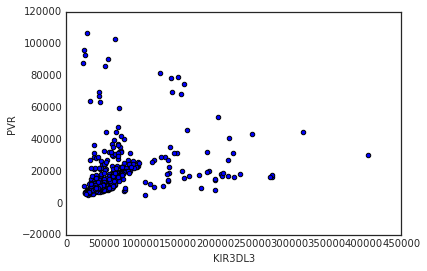

ZNF17


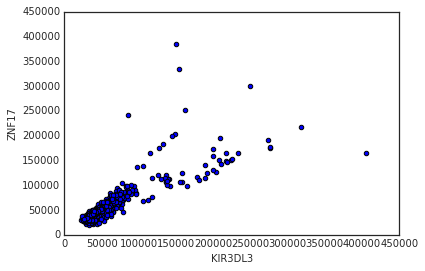

FUT3


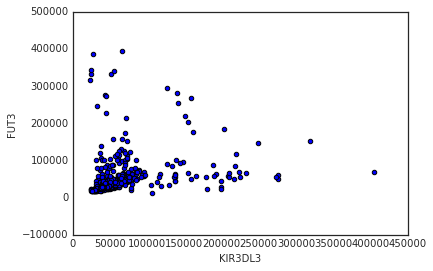

JUND


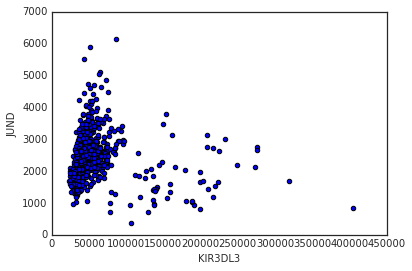

RAX2


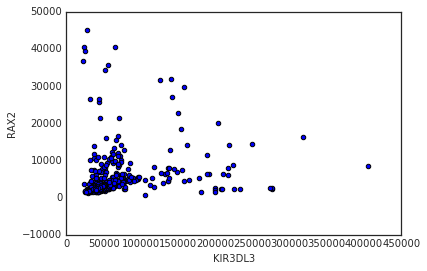

ATP1A3


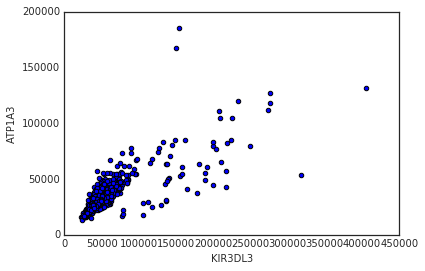

NOTCH3


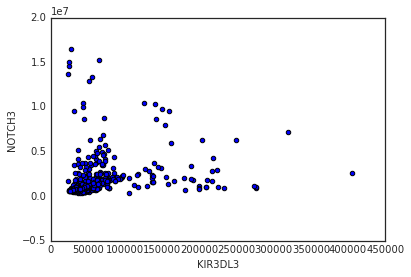

In [16]:
gene = 'KIR3DL3'
for rg in ref_genes:
    print rg
    nonanchor = df_kir_tmp[kmers[20][gene]].sum(axis=1)
    normalizer = df_tmp[refs[rg]].sum(axis=1)
    plt.scatter(nonanchor, normalizer)
    plt.xlabel('KIR3DL3')
    plt.ylabel(rg)
    plt.show()
    plt.clf()

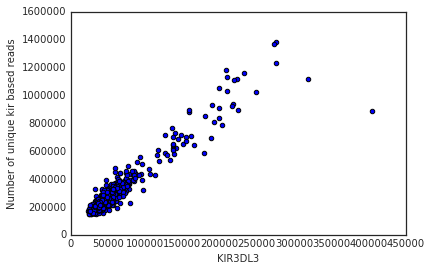

In [17]:
gene = 'KIR3DL3'
nonanchor = df_kir_tmp[kmers[20][gene]].sum(axis=1)
normalizer = df_kir_tmp[all_kir_kmers].sum(axis=1)
plt.scatter(nonanchor, normalizer)
plt.xlabel(gene)
plt.ylabel('Number of unique kir based reads')

In [8]:
samples = population_dictionary_stripped[population]
df_tmp = df_whole.ix[samples].dropna()
df_tmp[kmers[20][gene]].describe()

,GTGGTGTCTGAAGGAGAACA,TGGTGTCTGAAGGAGAACAT,GGTGTCTGAAGGAGAACATG,GTGTCTGAAGGAGAACATGT,TGTCTGAAGGAGAACATGTG,GTCTGAAGGAGAACATGTGG,TCTGAAGGAGAACATGTGGC,CTGAAGGAGAACATGTGGCT,TGAAGGAGAACATGTGGCTC,GAAGGAGAACATGTGGCTCT,...,TGGGTCACTAAGGTCTGACC,GTGGGTCACTAAGGTCTGAC,AGTGGGTCACTAAGGTCTGA,CAGTGGGTCACTAAGGTCTG,GCAGTGGGTCACTAAGGTCT,AGCAGTGGGTCACTAAGGTC,AAGCAGTGGGTCACTAAGGT,CAAGCAGTGGGTCACTAAGG,ACAAGCAGTGGGTCACTAAG,ACCTGTAATCACGATGTCCA
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,...,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,57.426073,56.510334,55.728140,55.009539,54.446741,54.292528,53.880763,53.839428,54.112878,54.079491,...,192.044515,196.182830,198.863275,198.381558,201.394277,204.656598,206.255962,207.523052,208.012719,355.019078
std,24.303279,24.000636,23.620423,23.483154,23.416251,23.627220,23.509249,23.657144,24.042458,24.025465,...,154.666689,157.297752,159.491680,158.991630,160.970466,163.707074,164.736519,165.307410,165.727502,224.399218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,40.000000,39.000000,39.000000,39.000000,38.000000,38.000000,38.000000,38.000000,...,123.000000,124.000000,126.000000,126.000000,128.000000,130.000000,131.000000,131.000000,131.000000,232.000000
50%,54.000000,53.000000,52.000000,51.000000,50.000000,50.000000,49.000000,49.000000,50.000000,50.000000,...,154.000000,158.000000,160.000000,161.000000,162.000000,165.000000,166.000000,168.000000,168.000000,300.000000
75%,68.000000,68.000000,66.000000,65.000000,64.000000,65.000000,64.000000,64.000000,64.000000,64.000000,...,195.000000,200.000000,203.000000,203.000000,207.000000,210.000000,213.000000,213.000000,215.000000,396.000000
max,202.000000,196.000000,185.000000,177.000000,178.000000,180.000000,179.000000,178.000000,179.000000,181.000000,...,1106.000000,1121.000000,1132.000000,1146.000000,1165.000000,1181.000000,1201.000000,1214.000000,1206.000000,1676.000000


In [9]:
len(kmers[20][gene])

442